In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os,cv2
import shutil

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pokemon.csv')

In [ ]:
!unzip -q /content/drive/MyDrive/images.zip

In [ ]:
df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [ ]:
df.shape,len(os.listdir('/content/images'))

((809, 3), 809)

In [ ]:
df.isna().sum()

Name       0
Type1      0
Type2    404
dtype: int64

In [ ]:
df.drop('Type2',axis = 1,inplace = True)

In [ ]:
df.sort_values(by='Name',inplace = True)

In [ ]:
df.drop('Name',axis = 1,inplace = True)

In [ ]:
img = []
for i in os.listdir('/content/images'):
 img.append(i)
img.sort()
df['Name']=img

In [ ]:
df = df[['Name','Type1']]

In [ ]:
df.loc[df['Type1'].isin(['Fire','Grass','Water'])]

,Name,Type1
459,abomasnow.png,Grass
593,alomomola.png,Water
590,amoonguss.png,Grass
751,araquanid.jpg,Water
58,arcanine.png,Fire
...,...,...
546,whimsicott.png,Grass
339,whiscash.png,Water
277,wingull.png,Water
745,wishiwashi-solo.jpg,Water


In [ ]:
df_3 = df.query('Type1 == "Fire" or Type1 == "Water" or Type1 == "Grass"')

(120, 120, 3)


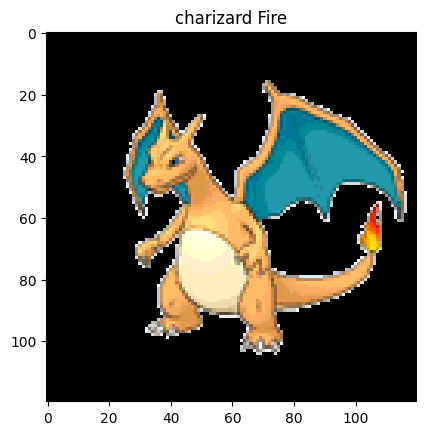

In [ ]:
img = cv2.imread('/content/images/charizard.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
name = df[df['Name']=='charizard.png'].Name.values[0].split('.')[0]
type1 = df[df['Name']=='charizard.png'].Type1.values[0]
plt.title(f'{name} {type1}')

print(img.shape)
plt.show()

In [ ]:
os.mkdir('Main')

In [ ]:
for i in df_3.Name:
  for j in os.listdir('/content/images'):
    if i==j:
      shutil.copy(os.path.join('/content/images/',j),'/content/Main/')

In [ ]:
len(os.listdir('/content/Main'))

245

In [ ]:
len(df_3.Type1.value_counts().index)

3

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255,
                                                      rotation_range=30,
                                                      width_shift_range=0.2,
                                                      height_shift_range=0.2,
                                                      horizontal_flip = True,
                                                      vertical_flip = True,
                                                      validation_split = 0.1)

In [ ]:
batch_size = 32

In [ ]:
train = idg.flow_from_dataframe(df_3,
                                directory='/content/Main',
                                x_col = 'Name',
                                y_col = 'Type1',
                                target_size = (120,120),
                                batch_size = batch_size,
                                subset = 'training')

Found 221 validated image filenames belonging to 3 classes.


In [ ]:
val = idg.flow_from_dataframe(df_3,
                              directory='/content/Main',
                                x_col = 'Name',
                                y_col = 'Type1',
                                target_size = (120,120),
                                batch_size = batch_size,
                                subset = 'validation')

Found 24 validated image filenames belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Input((120,120,3),batch_size = 32,name = 'Input'))


model.add(tf.keras.layers.Conv2D(16,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'valid',
                                 activation = 'relu',
                                 name = 'Conv_Layer1'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),
                                    strides = (2,2),
                                    padding = 'valid',
                                    name = 'Pool_layer1'))

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'valid',
                                 activation = 'relu',
                                 name = 'Conv_Layer2'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),
                                    strides = (2,2),
                                    padding = 'valid',
                                    name = 'Pool_layer2'))

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'valid',
                                 activation = 'relu',
                                 name = 'Conv_Layer3'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),
                                    strides = (2,2),
                                    padding = 'valid',
                                    name = 'Pool_layer3'))



model.add(tf.keras.layers.Flatten(name = 'Flatten'))
model.add(tf.keras.layers.Dense(64,activation = 'relu',name = 'Hidden'))
model.add(tf.keras.layers.Dense(3,activation = 'softmax',name = 'Output_layer'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_Layer1 (Conv2D)        (32, 118, 118, 16)        448       
                                                                 
 Pool_layer1 (MaxPooling2D)  (32, 59, 59, 16)          0         
                                                                 
 Conv_Layer2 (Conv2D)        (32, 57, 57, 32)          4640      
                                                                 
 Pool_layer2 (MaxPooling2D)  (32, 28, 28, 32)          0         
                                                                 
 Conv_Layer3 (Conv2D)        (32, 26, 26, 32)          9248      
                                                                 
 Pool_layer3 (MaxPooling2D)  (32, 13, 13, 32)          0         
                                                                 
 Flatten (Flatten)           (32, 5408)               

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
                    loss = tf.keras.losses.CategoricalCrossentropy(),
                    metrics = ['accuracy'])

In [ ]:
model.fit(train,
                batch_size = batch_size,
                epochs = 20,
                validation_data = val)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/20
7/7 [==============================] - 2s 153ms/step - loss: 1.0829 - accuracy: 0.4615 - val_loss: 1.0852 - val_accuracy: 0.3750
Epoch 2/20
7/7 [==============================] - 1s 144ms/step - loss: 1.0631 - accuracy: 0.4751 - val_loss: 1.0645 - val_accuracy: 0.3750
Epoch 3/20
7/7 [==============================] - 1s 152ms/step - loss: 1.0490 - accuracy: 0.4751 - val_loss: 1.1029 - val_accuracy: 0.3750
Epoch 4/20
7/7 [==============================] - 1s 141ms/step - loss: 1.0372 - accuracy: 0.4706 - val_loss: 1.0845 - val_accuracy: 0.3750
Epoch 5/20
7/7 [==============================] - 1s 138ms/step - loss: 1.0318 - accuracy: 0.4887 - val_loss: 1.0967 - val_accuracy: 0.3333
Epoch 6/20
7/7 [==============================] - 1s 140ms/step - loss: 1.0307 - accuracy: 0.4932 - val_loss: 1.0957 - val_accuracy: 0.2917
Epoch 7/20
7/7 [==============================] - 1s 144ms/step - loss: 1.0196 - accuracy: 0.4796 - val_loss: 1.0803 - val_accuracy: 0.2917
Epoch 8/20
7/7 [====

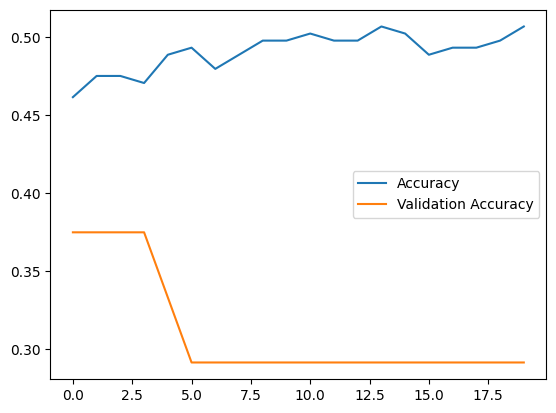

In [ ]:
plt.plot(model.history.history['accuracy'],label = 'Accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()

In [ ]:
!wget https://i.pinimg.com/originals/99/f4/7c/99f47c320d049982eafaca508cb9da29.jpg

--2023-11-22 10:00:05--  https://i.pinimg.com/originals/99/f4/7c/99f47c320d049982eafaca508cb9da29.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.64.122.75, 23.64.122.66, 2600:1413:a000::172c:463, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.64.122.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73194 (71K) [image/jpeg]
Saving to: ‘99f47c320d049982eafaca508cb9da29.jpg.1’

99f47c320d049982eaf 100%[===================>]  71.48K  --.-KB/s    in 0.005s  

2023-11-22 10:00:05 (13.9 MB/s) - ‘99f47c320d049982eafaca508cb9da29.jpg.1’ saved [73194/73194]



In [ ]:
image = cv2.imread('/content/99f47c320d049982eafaca508cb9da29.jpg')

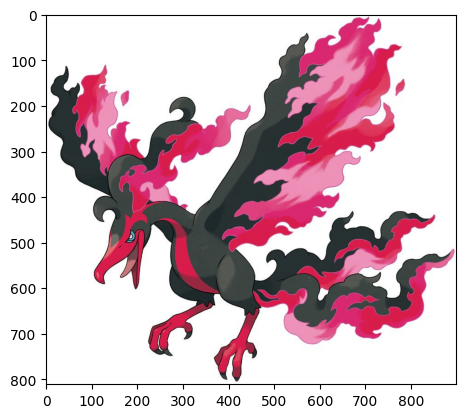

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image/255.0
plt.imshow(image)

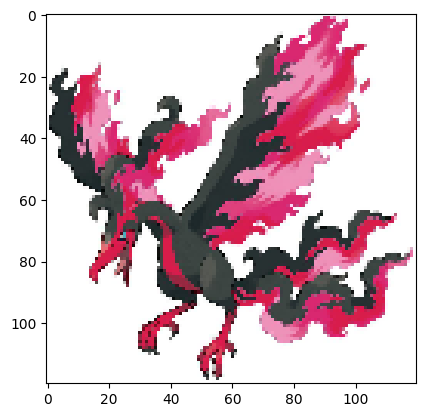

In [ ]:
img = cv2.resize (image,(120,120))
plt.imshow(img)

In [ ]:
img = np.expand_dims(img,axis = 0)

In [ ]:
img.shape

(1, 120, 120, 3)

In [ ]:
model.predict(img)

1/1 [==============================] - 0s 101ms/step


array([[0.32957163, 0.47719064, 0.19323778]], dtype=float32)

In [ ]:
train.class_indices

{'Fire': 0, 'Grass': 1, 'Water': 2}